In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dados/himmelblau_log.csv")

In [3]:
X = df[['x0', 'x1']]
y = df['y']

In [4]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

In [76]:
mae_tests = []
mae_trains = []
depths = range(2,26)

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=2)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    mae_tests.append(mean_absolute_error(y_test, y_pred_test))
    mae_trains.append(mean_absolute_error(y_train, y_pred_train))

    # print(f"{depth}: MAE (train) = ", mae_train)
    # print(f"{depth}: MAE (test/train) = ", mae_test, mae_train)

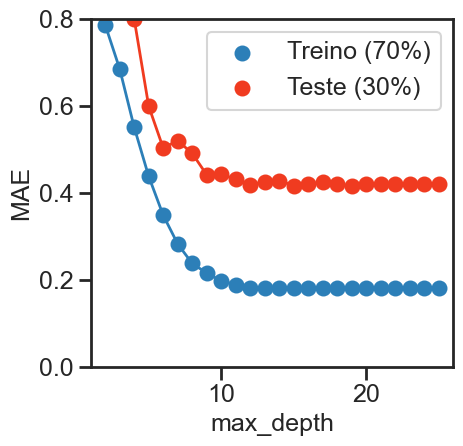

In [77]:
import seaborn as sns
sns.set_style("ticks")

plt.plot(depths, mae_trains, color='#2c7fb8',linestyle='-', linewidth=2)
plt.plot(depths, mae_tests, color='#f03b20',linestyle='-', linewidth=2)
plt.scatter(depths, mae_trains, color='#2c7fb8', label="Treino (70%)", s=100)
plt.scatter(depths, mae_tests, color='#f03b20', label="Teste (30%)", s=100)
# plt.plot(3*np.ones(100),np.linspace(0.5,1.05, 100), color="black", linestyle="--", linewidth=2)
plt.ylim(0.0,0.8)
plt.xlim(1,26)
plt.xlabel("max_depth", fontsize=18)  
plt.ylabel('MAE', fontsize=18)
# plt.xticks([1,3,5,7,9,11,13])
plt.tick_params(axis='both', which='major', labelsize=18, width=2)
plt.legend(loc="best", fontsize=18)
plt.gca().set_aspect(30)

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.tight_layout()

plt.savefig("../graficos/train_test_early_stopping_regression.png", dpi=400, format='png', bbox_inches='tight')
plt.show()

In [6]:
best_params = {'max_depth': 9,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 49}

In [7]:
model = DecisionTreeRegressor(**best_params)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f"MAE (train) = {mae_train:.4f}")
print(f"MAE (test) = {mae_test:.4f}")

MAE (train) = 0.3198
MAE (test) = 0.4742


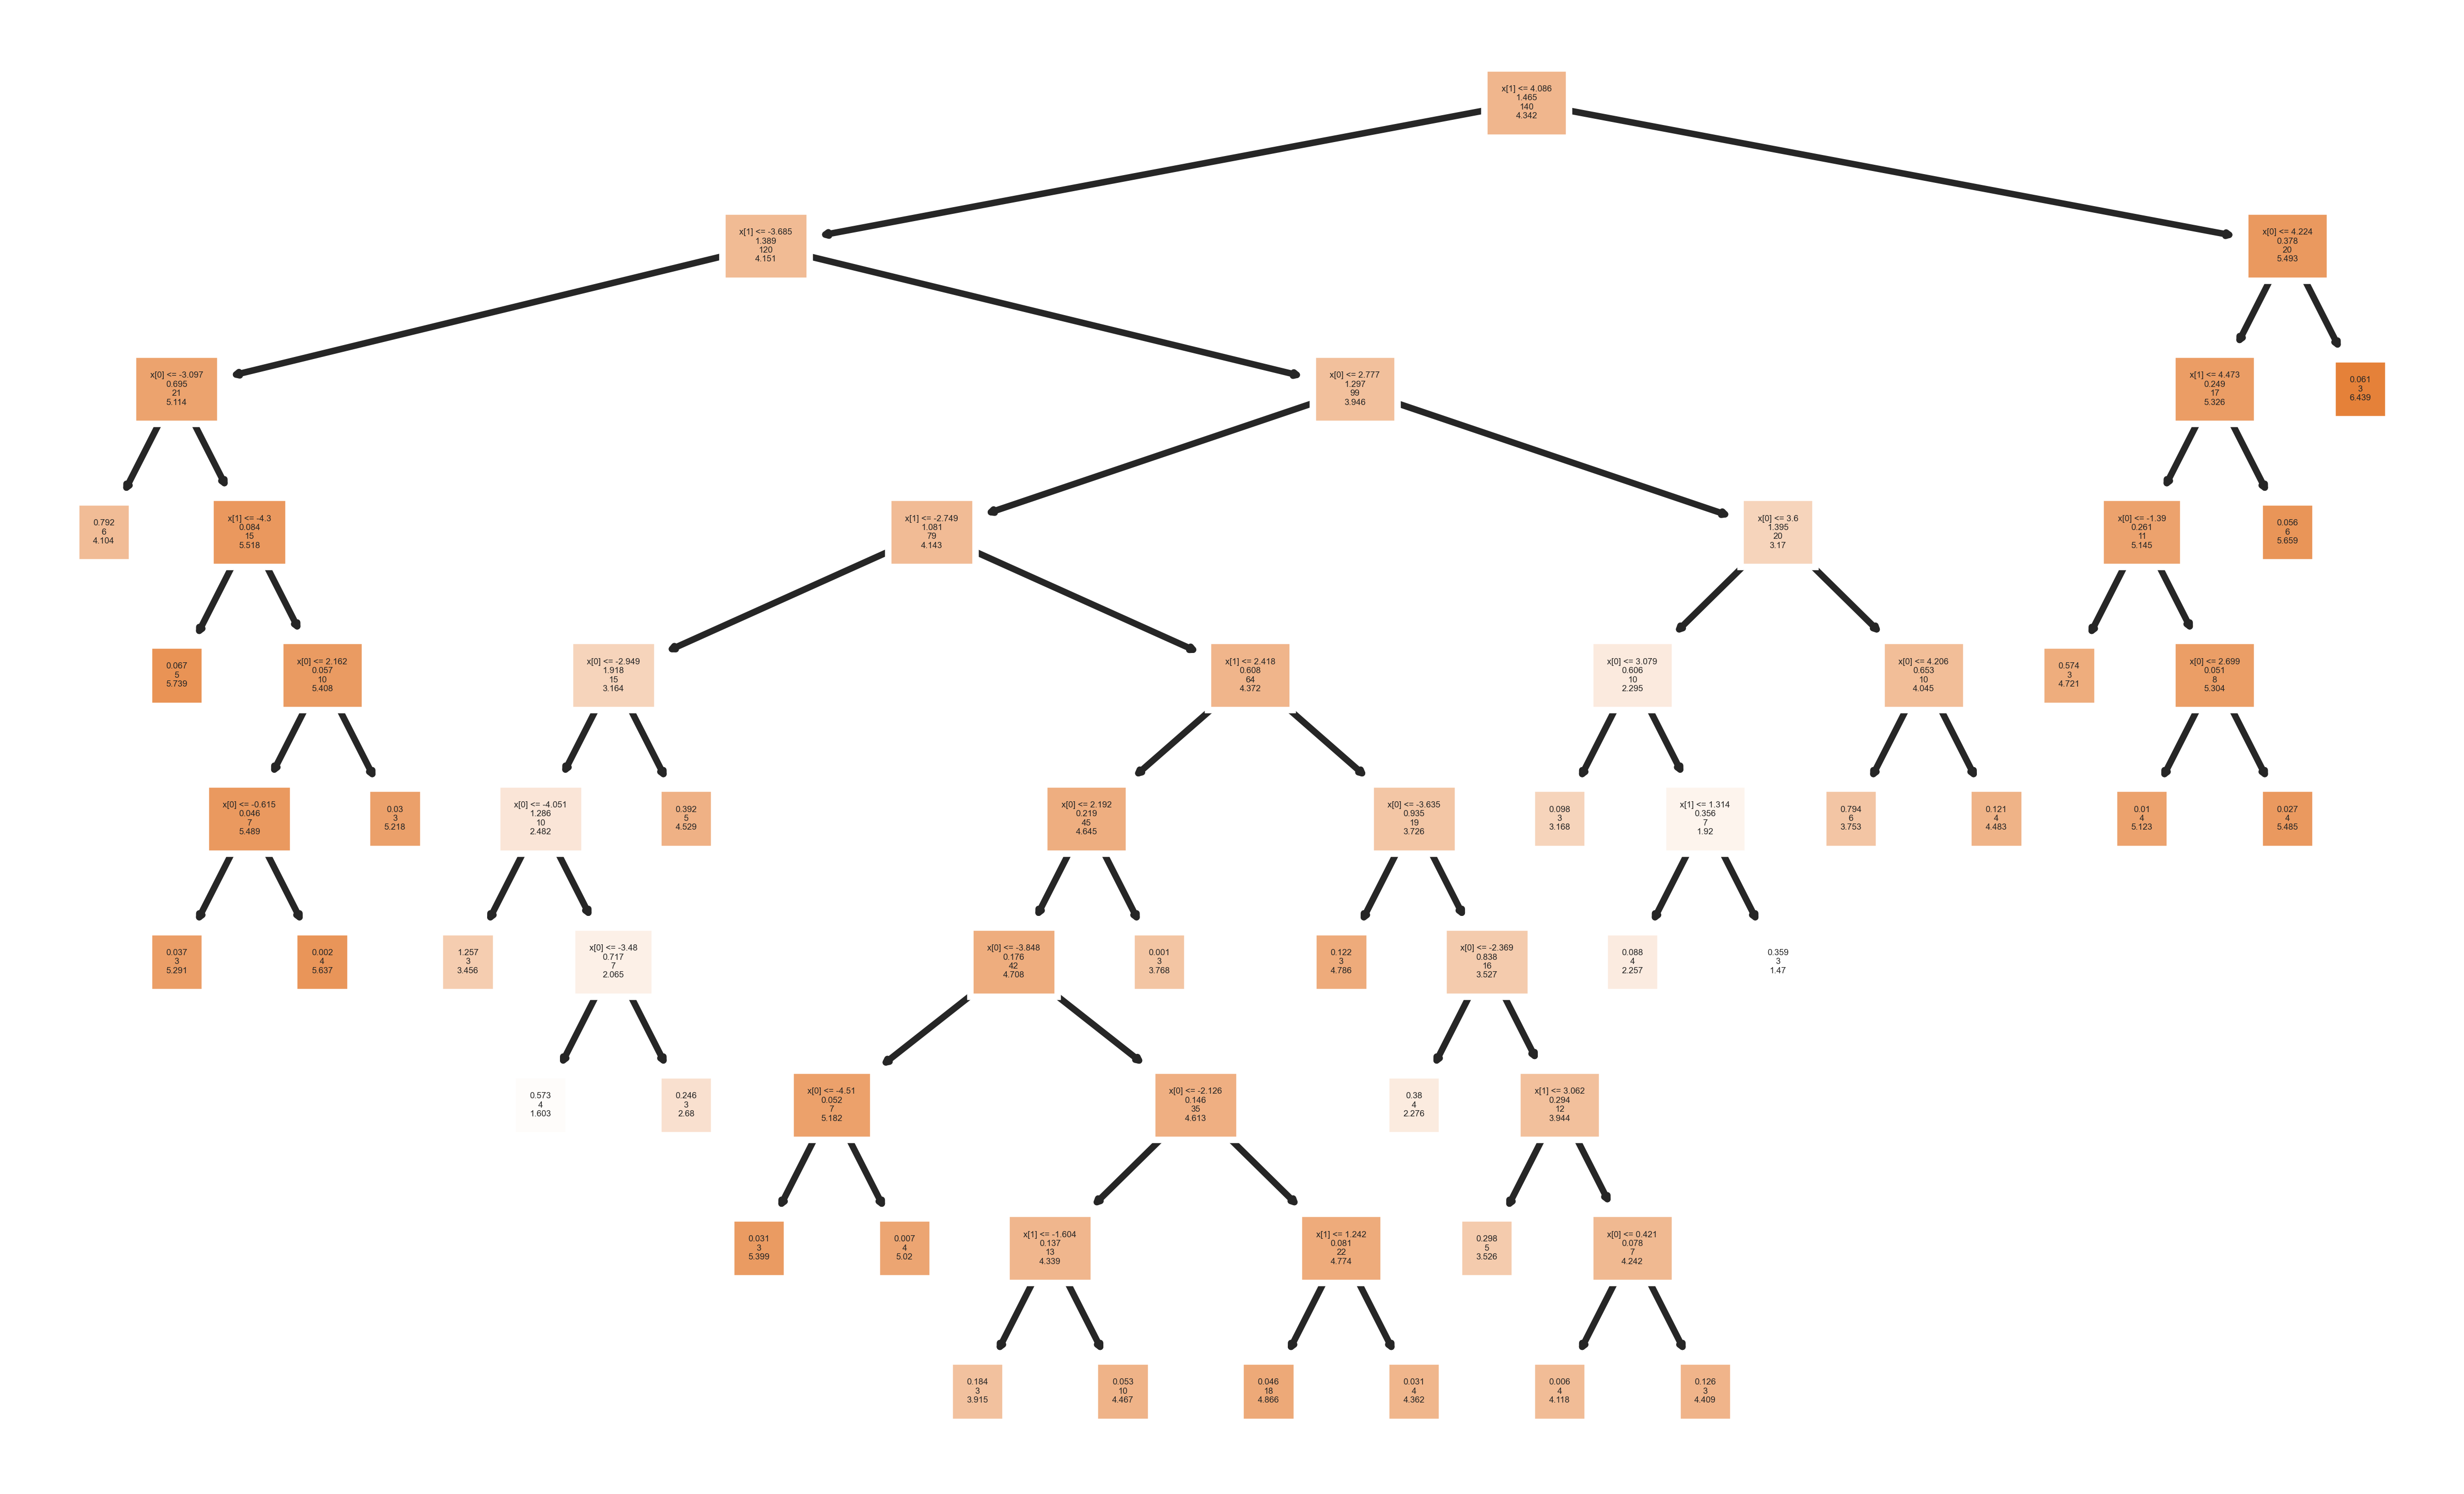

In [74]:
fig = plt.figure(figsize=(10,6), dpi=600)
plot_tree(model, filled=True, fontsize=2, label='none')
# plt.savefig('decision_tree_regression_plt.png', dpi=600, format='png', bbox_inches='tight', transparent=False)
plt.show()

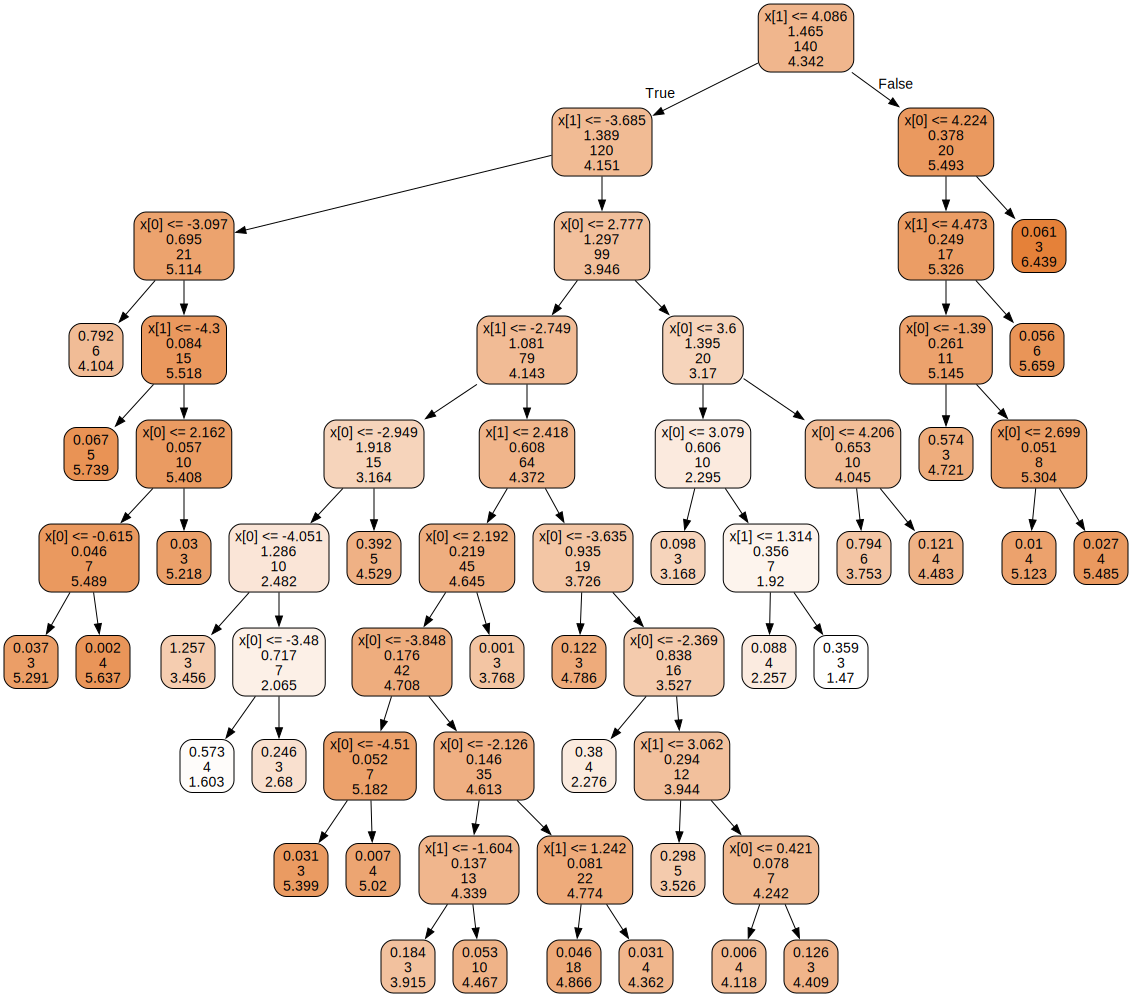

In [75]:
import graphviz

dot_data = export_graphviz(
    model,
    filled=True,
    rounded=True,
    label='none'
)

graph = graphviz.Source(dot_data)
graph

In [39]:
from sklearn.inspection import DecisionBoundaryDisplay

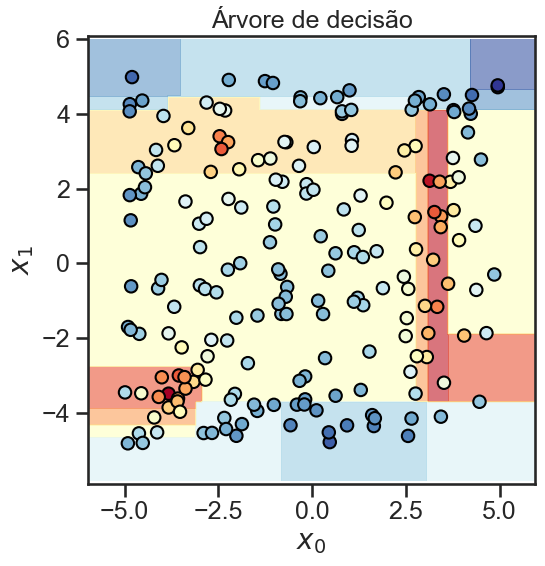

In [72]:
boundary = DecisionBoundaryDisplay.from_estimator(model, X, grid_resolution=300, cmap=plt.cm.RdYlBu, alpha=0.6)

boundary.ax_.set_box_aspect(aspect=1)

boundary.ax_.scatter(X.iloc[:,0], X.iloc[:,1], c=y, edgecolor="black", cmap=plt.cm.RdYlBu, s=80)


boundary.ax_.set_xlabel("$x_0$", fontsize=20)
boundary.ax_.set_ylabel("$x_1$", fontsize=20)
boundary.ax_.tick_params(axis='both', which='major', labelsize=18)
boundary.ax_.set_title("Árvore de decisão", fontsize=18)

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.tight_layout()
plt.gca().set_aspect(1)
# plt.savefig('decision_tree_regression_boundary.png', dpi=600, format='png', bbox_inches='tight', transparent=False)
plt.show()

/Users/leseixas/intelligible/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


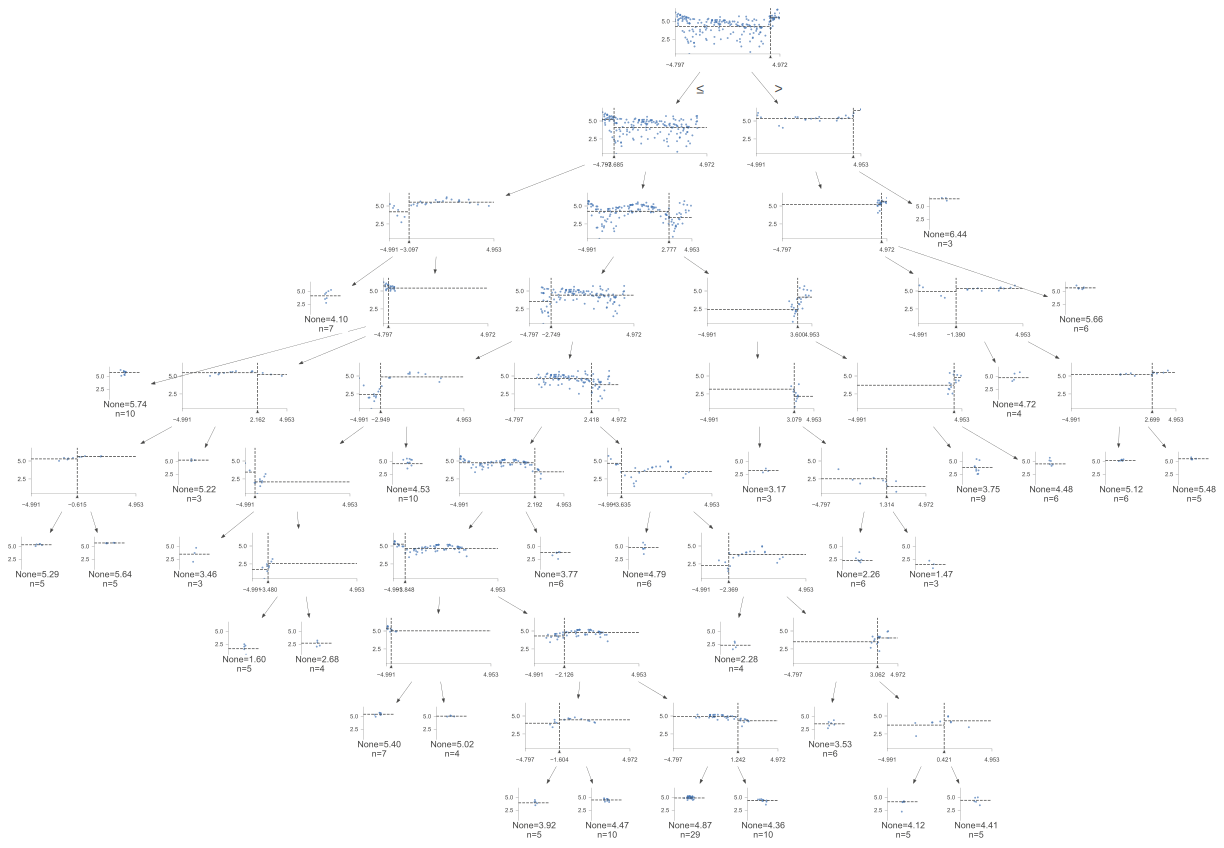

In [48]:
import dtreeviz

viz_model = dtreeviz.model(model, X.values, y.values) # target_name='Classes', class_names=['0', '1'], feature_names=['x0', 'x1']

viz_model.view(scale=1.0) # colors={'classes': [None, None, ['#377eb8', '#e41a1c']]}

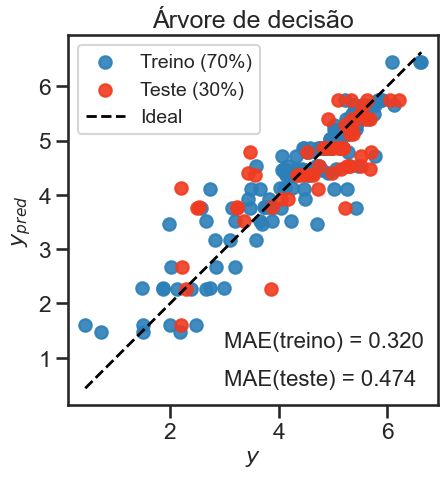

In [13]:
import seaborn as sns
sns.set_theme(style='ticks', context='talk')
plt.scatter(y_train, y_pred_train, label='Treino (70%)', alpha=0.9, color='#2c7fb8')
plt.scatter(y_test, y_pred_test, label='Teste (30%)', alpha=0.9, color='#f03b20')

# Plot the 45-degree line (line with angular coefficient of 1)
x_line = np.linspace(min(y_train), max(y_train), 100)
plt.plot(x_line, x_line, color='black', linestyle='--', linewidth=2, label='Ideal')

plt.xlabel("$y$", fontsize=16)
plt.ylabel("$y_{pred}$", fontsize=16)
plt.legend(fontsize=14)
plt.text(3,1.2,f"MAE(treino) = {mae_train:.3f}", fontsize=16)
plt.text(3,0.5,f"MAE(teste) = {mae_test:.3f}", fontsize=16)
plt.title("Árvore de decisão", fontsize=18)
plt.gca().set_aspect("equal", adjustable="box")
plt.savefig('../graficos/exemplo04/decision_tree_regression.png', dpi=600, format='png', bbox_inches='tight', transparent=False)
plt.show()

In [110]:
import optuna
from sklearn.tree import DecisionTreeRegressor

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 3, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 10),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 50)
    }
    
    model = DecisionTreeRegressor(**param) # device='cuda'
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred_test)

# Create a study objetive and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

best_params = study.best_params
print('Best parameters:', best_params)

[I 2024-03-09 09:36:01,500] A new study created in memory with name: no-name-a7db0562-b666-40fb-a2c3-227cbec0883b
[I 2024-03-09 09:36:01,541] Trial 0 finished with value: 0.33091705620756384 and parameters: {'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_leaf_nodes': 31}. Best is trial 0 with value: 0.33091705620756384.


[I 2024-03-09 09:36:01,559] Trial 1 finished with value: 0.46727402586984207 and parameters: {'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_leaf_nodes': 15}. Best is trial 0 with value: 0.33091705620756384.
[I 2024-03-09 09:36:01,575] Trial 2 finished with value: 0.3942172106201007 and parameters: {'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_leaf_nodes': 28}. Best is trial 0 with value: 0.33091705620756384.
[I 2024-03-09 09:36:01,610] Trial 3 finished with value: 0.33673610330351506 and parameters: {'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_leaf_nodes': 31}. Best is trial 0 with value: 0.33091705620756384.
[I 2024-03-09 09:36:01,632] Trial 4 finished with value: 0.346902326938901 and parameters: {'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_leaf_nodes': 24}. Best is trial 0 with value: 0.33091705620756384.
[I 2024-03-09 09:36:01,659] Trial 5 finished with value: 0.340146471218057 and para

Best parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_leaf_nodes': 49}


In [111]:
best_params = {'max_depth': 9,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 49}

{'max_depth': 9,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 49}